In [1]:
# Compare wavelength solution between two different models

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import miricoord.mrs.mrs_tools as mt

In [3]:
newmodel='flt3'
oldmodel='flt2'
ntxt='FLT-3'
otxt='FLT-2'

In [4]:
# Define x vectors up slices
cvec=['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']

x_channels=np.zeros(12)
x_channels[0]=240
x_channels[1]=240
x_channels[2]=242

x_channels[3]=718
x_channels[4]=714
x_channels[5]=717

x_channels[6]=763
x_channels[7]=734
x_channels[8]=733

x_channels[9]=194
x_channels[10]=191
x_channels[11]=194


In [5]:
wave_old=np.zeros([1024,12])
wave_new=np.zeros([1024,12])


In [6]:
mt.set_toolversion(oldmodel)
for ii in range(0,12):
    xvec=np.zeros(1024)+x_channels[ii]
    yvec=np.arange(1024)
    vals=mt.xytoabl(xvec,yvec,cvec[ii])
    wave_old[:,ii]=vals['lam']
    
mt.set_toolversion(newmodel)
for ii in range(0,12):
    xvec=np.zeros(1024)+x_channels[ii]
    yvec=np.arange(1024)
    vals=mt.xytoabl(xvec,yvec,cvec[ii])
    wave_new[:,ii]=vals['lam']    

Text(0.5, 1.0, 'FLT-3 vs FLT-2 wavelength solution')

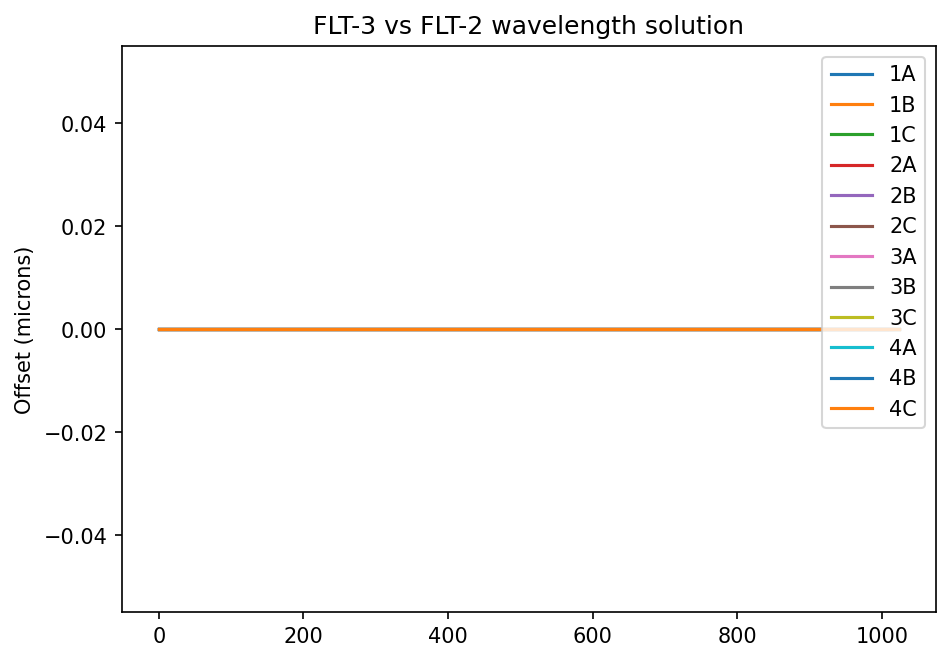

In [7]:
plt.figure(figsize=(7,5),dpi=150)
ax = plt.gca()

for ii in range(0,12):
    thisnew=wave_new[:,ii]
    thisold=wave_old[:,ii]
    indx=np.where((thisnew > 0)&(thisold > 0))
    plt.plot(thisnew[indx]-thisold[indx],label=cvec[ii])
    
plt.legend()
plt.ylabel('Offset (microns)')
plt.title(ntxt+' vs '+ otxt+ ' wavelength solution')